# 01 Install & Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import tensorflow as tf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 02 Data Acquisition


In [4]:
data = pd.read_csv('dataset_komentar_instagram_cyberbullying.csv')
data.head()

,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


# 03 Text Preprocessing

In [5]:

import re

def text_preprocessing(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()                               # Menghapus whitespaces
  return text

In [6]:
%time data['clean_teks'] = data['Instagram Comment Text'].apply(text_preprocessing)

# Perhatikan waktu komputasi ketika proses text preprocessing, bandingkan dengan langkah text preprocessing pada pertemuan sebelumnya

CPU times: user 7.81 ms, sys: 970 µs, total: 8.78 ms
Wall time: 12.7 ms


In [7]:
data.head()

,Id,Sentiment,Instagram Comment Text,clean_teks
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,username tolol gak ada hubungan nya keguguran ...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tatacowo bgt dibelain balikanhadewwn...
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn termewek skr lengket lg duhhh kok labil b...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kalau kesel dengan att nya gausah ke a...
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan itu lgsakit jiwaknp harus d...


# 05 Word Embedding

## Word2Vec from Scratch

In [8]:
# Import library
import gensim

# Lihat versi Gensim yang digunakan
gensim.__version__

'4.3.1'

In [9]:
# Tokenize kata pada setiap kalimat
def tokenization(text):
  text = re.split('\W+', text)
  return text

sentences = data['clean_teks'].apply(lambda x: tokenization(x.lower()))
sentences

0      [username, tolol, gak, ada, hubungan, nya, keg...
1      [geblek, lo, tatacowo, bgt, dibelain, balikanh...
2      [kmrn, termewek, skr, lengket, lg, duhhh, kok,...
3      [intinya, kalau, kesel, dengan, att, nya, gaus...
4      [hadewwwww, permpuan, itu, lgsakit, jiwaknp, h...
                             ...                        
395    [bangga, sama, suami, yg, selalu, ingat, istri...
396    [apaoun, pekerjaannya, yg, penting, halal, u, ...
397    [gojek, itu, mayoritas, pegangguran, yang, lam...
398    [username, aslinya, cantik, dan, ayu, loh, mba...
399    [username, suami, saya, seumuran, sama, saya, ...
Name: clean_teks, Length: 400, dtype: object

In [10]:
# Defenisikan parameter training Word2Vec

EMBEDDING_SIZE = 100    # Dimensi word vektor / neuron pada projection (hidden) layer
WINDOW_SIZE = 5         # Window size. Jarak maksimum antara kata saat ini dan yang diprediksi dalam sebuah
MIN_WORD  = 1           # Model akan mengabaikan semua kata dengan frekuensi total lebih rendah dari ini (opsional)
EPOCH = 10              # Jumlah iterasi (epoch).
SG = 1                  # Strategi algoritma pelatihan: 1 untuk skip-gram, 0 untuk CBOW
NEGATIVE = 5            # Negative sampling. Jika 0, negative sampling tidak digunakan

In [11]:
%%time 

# Proses training Word2Vec
from gensim.models import Word2Vec, FastText, KeyedVectors
model_word2vec = Word2Vec(sentences, vector_size=EMBEDDING_SIZE, sg=SG, min_count=MIN_WORD, window=WINDOW_SIZE, negative=NEGATIVE, epochs=EPOCH)


CPU times: user 489 ms, sys: 6.36 ms, total: 495 ms
Wall time: 499 ms


In [12]:
# Save Word2Vec sebagai full model
model_word2vec.save('myvec-word2vec-100.model')

In [13]:
# Save Word2Vec sebagai wordvectors. Hanya menyimpan kata & trained embeddingnya
word2vec_word_vectors = model_word2vec.wv
word2vec_word_vectors.save('myvec-word2vec-100.wordvectors')

In [14]:
# Cari nilai vektor dari kata tertentu
model_word2vec.wv['anak']

array([-0.08965279,  0.16122237,  0.0638966 ,  0.02110137,  0.04004653,
       -0.35366172,  0.19840175,  0.45647717, -0.16275978, -0.09879215,
       -0.14553635, -0.39760676, -0.0878851 ,  0.07475206, -0.10774878,
       -0.19613044,  0.07109585, -0.26879856, -0.04475833, -0.37825167,
        0.15513504,  0.14419198,  0.17874874, -0.25801843, -0.05426653,
       -0.02525695, -0.23251732, -0.10477359, -0.22212471,  0.00905766,
        0.24580173,  0.01866961,  0.12756453, -0.15772682, -0.03114882,
        0.27847412,  0.06334408, -0.1414518 , -0.08433933, -0.46753526,
        0.07838009, -0.20770684, -0.16797167,  0.13248251,  0.18054982,
       -0.1837914 , -0.29100138, -0.09075769,  0.09493707,  0.15614803,
        0.07701831, -0.22299409, -0.04556736,  0.01100311, -0.16314411,
        0.11218885,  0.16754515, -0.06226735, -0.13510388,  0.13087931,
        0.17601721,  0.07877944,  0.00412523, -0.01790112, -0.41677043,
        0.25730184,  0.10243613,  0.17330727, -0.39889967,  0.37

In [15]:
# Menemukan kata kata teratas yang paling mirip dari kata terentu
# Menghitung kesamaan dari vektor bobot proyeksi dari kata-kata yang diberikan dan vektor untuk setiap kata dalam model.

model_word2vec.wv.most_similar('anak')

[('lancar', 0.9983526468276978),
 ('lihat', 0.9983174204826355),
 ('akan', 0.998310923576355),
 ('bego', 0.998302698135376),
 ('bikin', 0.9982948899269104),
 ('bnyk', 0.9982319474220276),
 ('dunia', 0.998180627822876),
 ('dr', 0.9981654286384583),
 ('pasangan', 0.9981565475463867),
 ('ini', 0.9981459975242615)]

In [16]:
# Kata-kata yang ingin kita plot vektornya
word_list = [ 'lancar', 'lihat', 'dunia', 'pasangan', 'akan', 'bego', 'bikin', 'ini']

# daftar vektor dari kata-kata tersebut
word_vectors = np.array([model_word2vec.wv[w] for w in word_list])
print(word_vectors)

[[-7.09369183e-02  1.36407360e-01  5.39028198e-02  9.64782946e-03
   4.69418280e-02 -2.86463469e-01  1.79923385e-01  3.81577402e-01
  -1.42584682e-01 -7.91290998e-02 -1.13864355e-01 -3.21624011e-01
  -7.80808851e-02  5.55211455e-02 -8.55581909e-02 -1.42658874e-01
   7.71626979e-02 -2.22251385e-01 -3.40721905e-02 -3.13153833e-01
   1.28853261e-01  1.20871030e-01  1.68039426e-01 -2.18546361e-01
  -4.65028509e-02 -1.13261538e-02 -1.91698775e-01 -1.01517923e-01
  -1.76337063e-01  1.09699005e-02  2.19871849e-01  2.76059397e-02
   1.01193912e-01 -1.32481828e-01 -1.40987979e-02  2.09504142e-01
   3.90364155e-02 -1.10778935e-01 -6.16719127e-02 -3.98110330e-01
   5.89217544e-02 -1.66410670e-01 -1.34655669e-01  1.01307884e-01
   1.39402479e-01 -1.58022031e-01 -2.30644986e-01 -6.40759096e-02
   7.52565190e-02  1.49708778e-01  7.48473480e-02 -1.78006679e-01
  -4.57864963e-02  8.46520590e-04 -1.34859979e-01  9.49850976e-02
   1.39838263e-01 -5.51995412e-02 -1.13506876e-01  1.09500691e-01
   1.48917

In [17]:
# Reduksi dimensi vektor ke 2D menggunakan PCA
from sklearn.decomposition import PCA, KernelPCA

dimred = PCA(n_components=2, copy=False, whiten=True)
red_word_vectors = dimred.fit_transform(word_vectors)

In [18]:
# Lihat vektor hasil PCA (dari 5 dimensi menjadi 2 dimensi)
red_word_vectors

array([[ 0.6493494 ,  0.2314753 ],
       [ 1.4527593 , -0.57214874],
       [-0.8754732 , -1.3639507 ],
       [ 0.99153143,  1.0130415 ],
       [-0.72699386, -0.66349167],
       [ 0.45051375, -0.15415831],
       [-0.74535704, -0.2772661 ],
       [-1.19633   ,  1.7865013 ]], dtype=float32)

In [19]:
def plot(datas, labels, fc='yellow'):
  # plot the dots
  plt.subplots_adjust(bottom = 0.1)
  plt.scatter(datas[:, 0], datas[:, 1], marker='o')

  # annotate labels
  for label, x, y in zip(labels, datas[:, 0], datas[:, 1]):
    plt.annotate(label, \
                 xy=(x, y), xytext=(-15, 15), \
                 textcoords='offset points', ha='right', va='bottom', \
                 bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5), \
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
  plt.show()

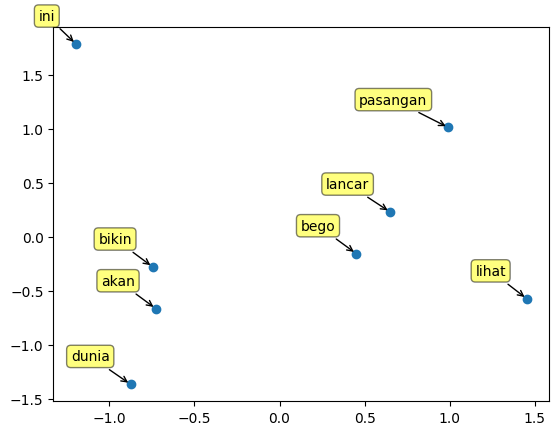

In [20]:
plot(red_word_vectors, word_list)

## FastText (Pre-Trained Model)
Pada contoh Word2Vec diatas, kita melatih suatu shallow neural network pada dataset SMS spam untuk mendapatkan word vectors. Pada contoh FastText ini, kita akan memanfaatkan pre-trained word vector yang sudah dilatih pada kumpulan data yang besar.

In [21]:
!pip -q install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [22]:
# Download dan unzip dataset
# Warning: proses download lama dan memakan diskspace yang besar (sekitar 7GB)
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gunzip cc.en.300.bin.gz

--2023-04-10 14:34:27--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 99.84.160.46, 99.84.160.61, 99.84.160.80, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|99.84.160.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G   115MB/s    in 28s     

2023-04-10 14:34:56 (152 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



In [23]:
import fasttext

# Load model FastText
ft_model = fasttext.load_model("cc.en.300.bin")

In [24]:
# Lihat vektor kata tertentu menggunakan pre-trained FastText
print(ft_model['anak'])

[ 2.42450818e-01  6.32418990e-02 -2.45161593e-01 -2.05890033e-02
  1.27277663e-02 -2.59373933e-02 -5.21341106e-03  1.34514064e-01
 -7.64094889e-02 -1.27056867e-01 -3.62890095e-01  1.35297015e-01
 -2.20065042e-01  4.24842089e-02  5.29587716e-02 -5.98831475e-03
 -1.18865341e-01 -1.11841932e-02 -1.89194083e-01  9.99911427e-02
 -1.38888493e-01 -1.43801555e-01  3.54859829e-02  2.61899345e-02
  7.98116624e-02 -2.10437085e-02  1.62220910e-01  2.04768270e-01
 -4.82459366e-02  3.53048742e-01  6.50913566e-02 -1.86739832e-01
  9.31903869e-02  1.04058556e-01  7.56956041e-02  1.09482139e-01
 -2.19687968e-02  5.79392910e-03 -1.71332240e-01 -2.85581052e-02
 -9.43390056e-02  9.69993919e-02  3.57175134e-02  1.92339525e-01
  9.95140076e-02  7.67444894e-02  5.52244596e-02  8.53588283e-02
  5.07597020e-03 -5.01559814e-03  5.16012125e-02 -9.66108441e-02
 -4.21354286e-02  2.49160469e-01 -1.68842122e-01 -1.33448988e-01
  6.80803657e-02 -7.95789957e-02  1.73364818e-01  9.08781141e-02
  7.88191110e-02  3.66272

# 06 Deep Learning for NLP

## Long short term memory network (LSTM)

### Memilih Panjang Sequence (max_length)

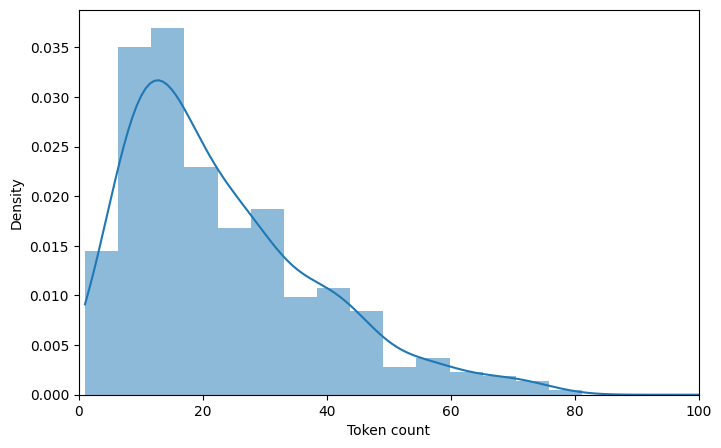

In [25]:
'''
Ada banyak cara untuk menentukan max_length
Intuisinya adalah kita tidak ingin memotong kalimat, atau terlalu banyak menambahkan padding (komputasi lebih lama)
Contoh ini, max_lenght ditentukan dari distribusi token pada dataset 
'''
token_lens = []

for text in data['clean_teks']:
    tokens = text.split()
    token_lens.append(len(tokens))

plt.figure(figsize=(8, 5))
sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [26]:
MAX_SEQ_LENGTH = 100

### Preparing Data for Embedding Layer

#### Tokenizing Data
Proses ini berbeda dengan tokenization pada text-preprocessing. Pada pemodelan dengan deep learning, tokenization merujuk pada membuat dictionary berdasarkan dataset.

In [27]:
'''
Proses vektorisasi teks dengan mengubah setiap teks menjadi token urutan bilangan int (setiap bilangan int menjadi indeks token dalam dictionary) 
'''
from keras.preprocessing.text import Tokenizer

In [28]:
NUM_WORDS = 100       # Frekuensi kemunculan kata. Hanya num_words-1 yang akan disimpan pada dictionary. Berarti kata dengan kemunculan <=num_words tidak digunakan.
OOV_TOKEN = '<unk>'   # Token khusus untuk mengganti kata yang tidak terdaftar dalam dictionary.

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token=OOV_TOKEN, lower=True, split=' ')
tokenizer.fit_on_texts(data['clean_teks'])

# Tambahkan token padding untuk menyamakan ukuran dimensi embedding layer
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

WV_DICTIONARY = tokenizer.word_index

WV_DICTIONARY_SIZE = len(WV_DICTIONARY)
print(WV_DICTIONARY_SIZE) # Lihat kata unik pada dictionary yang dihasilkan

3224


In [29]:
# Lihat dictionary hasil tokenisasi
WV_DICTIONARY

{'<unk>': 1,
 'yg': 2,
 'di': 3,
 'dan': 4,
 'username': 5,
 'nya': 6,
 'ya': 7,
 'ga': 8,
 'dia': 9,
 'sama': 10,
 'aja': 11,
 'gak': 12,
 'ini': 13,
 'itu': 14,
 'yang': 15,
 'ada': 16,
 'anak': 17,
 'orang': 18,
 'banget': 19,
 'si': 20,
 'artis': 21,
 'org': 22,
 'semoga': 23,
 'jadi': 24,
 'cantik': 25,
 'bgt': 26,
 'jd': 27,
 'kaya': 28,
 'juga': 29,
 'apa': 30,
 'buat': 31,
 'udah': 32,
 'punya': 33,
 'kalo': 34,
 'saya': 35,
 'suka': 36,
 'mba': 37,
 'bisa': 38,
 'klo': 39,
 'ibu': 40,
 'sm': 41,
 'baik': 42,
 'kan': 43,
 'lagi': 44,
 'suami': 45,
 'lo': 46,
 'lebih': 47,
 'selalu': 48,
 'sih': 49,
 'ke': 50,
 'mau': 51,
 'lu': 52,
 'allah': 53,
 'mbak': 54,
 'tau': 55,
 'laki': 56,
 'jg': 57,
 'biar': 58,
 'udh': 59,
 'pelakor': 60,
 'istri': 61,
 'keluarga': 62,
 'n': 63,
 'pake': 64,
 'lah': 65,
 'deh': 66,
 'bagus': 67,
 'tp': 68,
 'nikah': 69,
 'sok': 70,
 'sangat': 71,
 'kita': 72,
 'ama': 73,
 'tapi': 74,
 'manusia': 75,
 'dari': 76,
 'gue': 77,
 'bilang': 78,
 'bukan': 

#### Text to Sequence

In [30]:
# Proses mengubah token hasil tokenisasi menjadi urutan bilangan int berdasarkan index dictionary.
data_seq = tokenizer.texts_to_sequences(data['clean_teks'])

In [31]:
# Lihat hasil setelah di ubah menjadi sequences
print(data['clean_teks'][10])
print(data_seq[10])

syarat sah nikah menurut agama islam hanya  yaitu  adanya cpp adanya cpw saksi wali nikah dan mas kawinmahar perkara makeup gak manglingi bukan syarat sah pernikahan sekalipun gak makeup tapi syarat yg  tersebut terpenuhi maka pernikahannya sah yak emak emak julids
[1, 1, 69, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 69, 4, 1, 1, 1, 1, 12, 1, 79, 1, 1, 1, 1, 12, 1, 74, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#### Add Padding & Truncation

In [32]:
from keras.utils import pad_sequences


In [33]:
PADDING = 'post'        # Berikan padding untuk setiap sequences. Terdapat dua pilihan dalam melakukan padding 'pre' or 'post'.
TRUNCATING = 'post'     # Menghapus token dari sequences yang lebih besar dari max_lenght. Terdapat dua pilihan dalam melakukan truncanting 'pre' or 'post'.

data_pad = pad_sequences(data_seq, maxlen=MAX_SEQ_LENGTH, padding=PADDING, truncating=TRUNCATING)

In [34]:
print(data['clean_teks'][10])
print(data_seq[10])
print(data_pad[10])

syarat sah nikah menurut agama islam hanya  yaitu  adanya cpp adanya cpw saksi wali nikah dan mas kawinmahar perkara makeup gak manglingi bukan syarat sah pernikahan sekalipun gak makeup tapi syarat yg  tersebut terpenuhi maka pernikahannya sah yak emak emak julids
[1, 1, 69, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 69, 4, 1, 1, 1, 1, 12, 1, 79, 1, 1, 1, 1, 12, 1, 74, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[ 1  1 69  1  1  1  1  1  1  1  1  1  1  1 69  4  1  1  1  1 12  1 79  1
  1  1  1 12  1 74  1  2  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


### One-hot Encoding

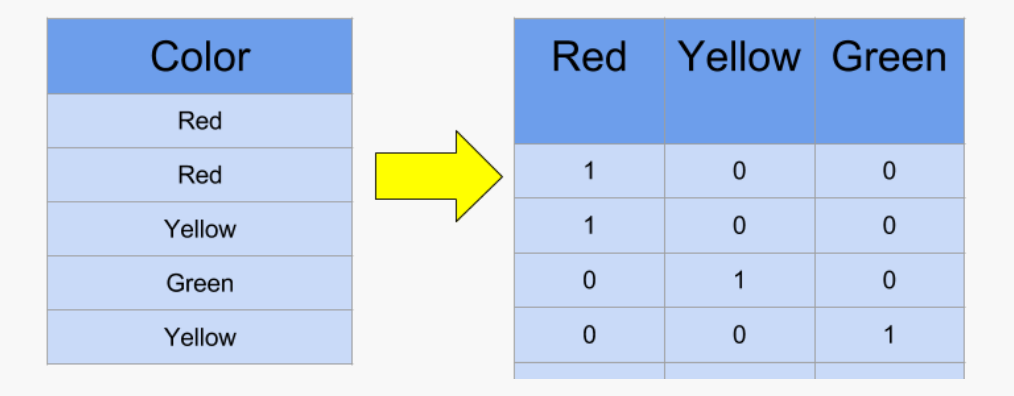

In [35]:
sentiment_dict = {'negative': 0, 'neutral': 1, 'positive': 2}
data['Sentiment'] = data['Sentiment'].apply(lambda x: sentiment_dict[x])

from keras.utils import to_categorical
Y = to_categorical(data['Sentiment'], num_classes=3)


In [36]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

### Train & Test Data Splitting

In [37]:
# Split arrays or matrices into random train and test subsets.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(data_pad, Y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 100), (80, 100), (320, 3), (80, 3))

### Define Model Architecture (LSTM)



In [38]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
'''
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

model_LSTM = Sequential()
model_LSTM.add(Embedding(                                           # Buat embedding layer yang menerima panjang dictionary hasil Tokenisasi
    input_dim = WV_DICTIONARY_SIZE,
    input_length = MAX_SEQ_LENGTH,
    output_dim = 64))      
model_LSTM.add(LSTM(64))                                            # Tambahkan satu layer LSTM
model_LSTM.add(Dropout(0.5))                             
model_LSTM.add(Dense(3, activation='softmax'))

In [40]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           206336    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 239,555
Trainable params: 239,555
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile model
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training

In [42]:
%%time

EPOCH = 20
BATCH_SIZE = 32

history_LSTM = model_LSTM.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/20
10/10 [==============================] - 11s 321ms/step - loss: 1.0118 - accuracy: 0.4656 - val_loss: 0.8644 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 3s 264ms/step - loss: 0.7972 - accuracy: 0.4781 - val_loss: 0.7084 - val_accuracy: 0.5125
Epoch 3/20
10/10 [==============================] - 2s 207ms/step - loss: 0.7381 - accuracy: 0.4844 - val_loss: 0.7046 - val_accuracy: 0.4875
Epoch 4/20
10/10 [==============================] - 1s 99ms/step - loss: 0.7070 - accuracy: 0.5250 - val_loss: 0.7061 - val_accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 1s 61ms/step - loss: 0.7157 - accuracy: 0.5219 - val_loss: 0.7054 - val_accuracy: 0.5000
Epoch 6/20
10/10 [==============================] - 1s 65ms/step - loss: 0.7408 - accuracy: 0.4719 - val_loss: 0.7055 - val_accuracy: 0.5000
Epoch 7/20
10/10 [==============================] - 0s 18ms/step - loss: 0.7470 - accuracy: 0.4531 - val_loss: 0.7101 - val_accuracy: 0.4875
Epoch 8/2

In [43]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

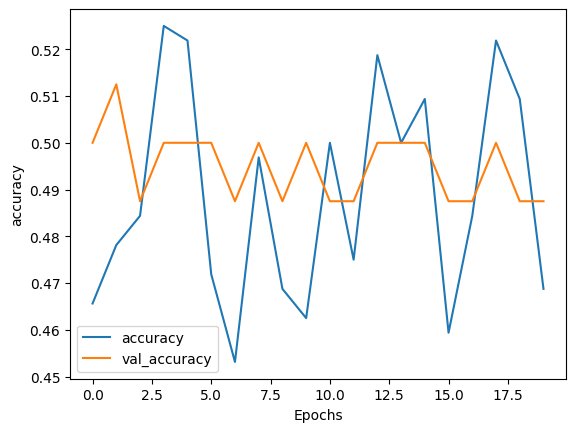

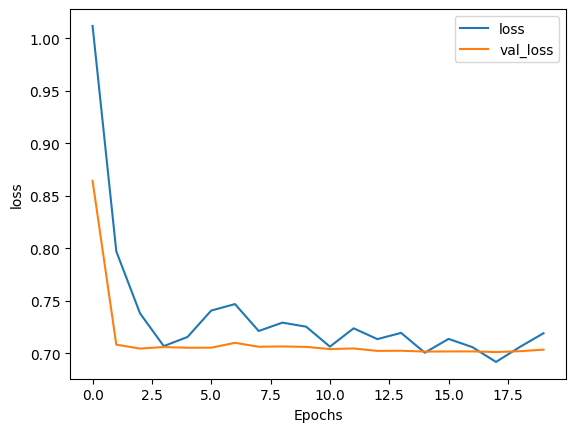

In [44]:
plot_graphs(history_LSTM, 'accuracy')
plot_graphs(history_LSTM, 'loss')

In [45]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_LSTM.history['accuracy'][i], history_LSTM.history['loss'][i], history_LSTM.history['val_accuracy'][i], history_LSTM.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.465625 	   1.011833 	   0.500000 	   0.864384
       2   0.478125 	   0.797152 	   0.512500 	   0.708356
       3   0.484375 	   0.738138 	   0.487500 	   0.704639
       4   0.525000 	   0.706979 	   0.500000 	   0.706092
       5   0.521875 	   0.715671 	   0.500000 	   0.705418
       6   0.471875 	   0.740844 	   0.500000 	   0.705473
       7   0.453125 	   0.746985 	   0.487500 	   0.710108
       8   0.496875 	   0.721363 	   0.500000 	   0.706371
       9   0.468750 	   0.729321 	   0.487500 	   0.706654
      10   0.462500 	   0.725461 	   0.500000 	   0.706229
      11   0.500000 	   0.706456 	   0.487500 	   0.704178
      12   0.475000 	   0.723918 	   0.487500 	   0.704717
      13   0.518750 	   0.713643 	   0.500000 	   0.702431
      14   0.500000 	   0.719556 	   0.500000 	   0.702555
      15   0.509375 	   0.700703 	   0.500000 	   0.701783
      16   0.459375 	   0.713834 	   0.487500 

### Evaluate

In [46]:
# Lakukan prediksi pada data uji
y_pred = np.argmax(model_LSTM.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

loss, accuracy = model_LSTM.evaluate(X_test, y_test)

3/3 [==============================] - 0s 14ms/step - loss: 0.7036 - accuracy: 0.4875


In [47]:
from sklearn.metrics import classification_report

# Tampilkan laporan klasifikasi yang dilakukan model pada data uji
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.97      0.49      0.66        79

    accuracy                           0.49        80
   macro avg       0.33      0.16      0.22        80
weighted avg       0.96      0.49      0.65        80



## Bidirectional Long short term memory network (Bi-LSTM) + Word2Vec
Contoh sebelumnya kita hanya menggunakan dictionary yang dihasilkan ketika proses Tokenizing. Lalu, ketika pemodelan ditambahkan layer embedding sebelum di fitkan ke layer LSTM.


Selanjutnya, kita akan memanfaatkan word2vec yang telah dilatih pada proses sebelumnya untuk mengubah teks menjadi bentuk vektor.





### Load Word2Vec

In [48]:
from gensim.models import KeyedVectors

# Load word2vec model
my_word2vec = KeyedVectors.load('myvec-word2vec-100.wordvectors', mmap='r')

# Get available vocabulary in the model
my_word2vec_vocab = set(my_word2vec.index_to_key)

# Get the embedding vector for a specific word (with error handling)
word = 'anak'
if word in my_word2vec_vocab:
    embedding_vector = my_word2vec[word]
    print(f'The embedding vector for "{word}" is: {embedding_vector}')
else:
    print(f'The word "{word}" is not in the vocabulary.')


The embedding vector for "anak" is: [-0.08965279  0.16122237  0.0638966   0.02110137  0.04004653 -0.35366172
  0.19840175  0.45647717 -0.16275978 -0.09879215 -0.14553635 -0.39760676
 -0.0878851   0.07475206 -0.10774878 -0.19613044  0.07109585 -0.26879856
 -0.04475833 -0.37825167  0.15513504  0.14419198  0.17874874 -0.25801843
 -0.05426653 -0.02525695 -0.23251732 -0.10477359 -0.22212471  0.00905766
  0.24580173  0.01866961  0.12756453 -0.15772682 -0.03114882  0.27847412
  0.06334408 -0.1414518  -0.08433933 -0.46753526  0.07838009 -0.20770684
 -0.16797167  0.13248251  0.18054982 -0.1837914  -0.29100138 -0.09075769
  0.09493707  0.15614803  0.07701831 -0.22299409 -0.04556736  0.01100311
 -0.16314411  0.11218885  0.16754515 -0.06226735 -0.13510388  0.13087931
  0.17601721  0.07877944  0.00412523 -0.01790112 -0.41677043  0.25730184
  0.10243613  0.17330727 -0.39889967  0.37475765 -0.22526938  0.24168195
  0.25006297 -0.07020313  0.2535611  -0.00408131  0.04574604 -0.00467099
 -0.18761021  0

In [49]:
word2vec_dict = {}
for anak in my_word2vec_vocab:
    word2vec_dict[anak] = my_word2vec.get_vector(anak)

print('The numbers of key-value pairs: ', len(word2vec_dict)) # Should be the same as the vocab size in the Word2Vec model


The numbers of key-value pairs:  3224


### Create Embedding Matrix

In [50]:
EMBEDDING_MATRIX = np.zeros(shape=(WV_DICTIONARY_SIZE, EMBEDDING_SIZE))

for word, i in tokenizer.word_index.items():
  embed_vector = word2vec_dict.get(word)
  if embed_vector is not None:               # Word is in the vocabulary learned by the w2v model
    EMBEDDING_MATRIX[i] = embed_vector

In [51]:
# Cek index keberapa di Word2Vec vocabulary dari suatu kata
print(WV_DICTIONARY.get('anak'))

17


In [52]:
# Cek vector dari suatu kata
print(EMBEDDING_MATRIX[25])

[-0.07808435  0.15318425  0.05903637  0.01675038  0.05087892 -0.34186849
  0.1981128   0.42577311 -0.15767388 -0.11689576 -0.13316785 -0.36721331
 -0.06444498  0.06627184 -0.07763609 -0.17171453  0.06563759 -0.25869837
 -0.03305986 -0.35639462  0.16060132  0.13531105  0.16947658 -0.22369523
 -0.0346958  -0.01242948 -0.2245436  -0.1001009  -0.19920777  0.0257829
  0.23371908  0.03644173  0.09713694 -0.16389856 -0.01511089  0.25666243
  0.04594669 -0.12893245 -0.06910193 -0.44733149  0.0741702  -0.194593
 -0.14874487  0.10785972  0.15998743 -0.1890953  -0.25700912 -0.0767004
  0.08220503  0.1546469   0.08468524 -0.21598518 -0.06558431  0.01582115
 -0.14341363  0.10824672  0.15137596 -0.05795948 -0.13535133  0.11666897
  0.15147427  0.0701929   0.00762693 -0.00704335 -0.39078152  0.26030034
  0.09871062  0.14954555 -0.37805229  0.35892242 -0.20809652  0.23317057
  0.22334291 -0.07033544  0.22068392 -0.00136152  0.0290301  -0.00794638
 -0.17508686  0.03394611 -0.15498507 -0.01795829 -0.210

In [53]:
# Cek dimensi word vector. X = jumlah kata pada vocabulary, y = dimensi vektor
EMBEDDING_MATRIX.shape

(3224, 100)

### Define Model (Bi LSTM)
Nah, sekarang kita membahkan layer embedding berdasarkan matrix embedding yang di dapatkan dari word2vec yang sudah kita latih sebelumnya. Selain itu, kita akan mencoba menggunakan arsitektur Bidirectional LSTM.

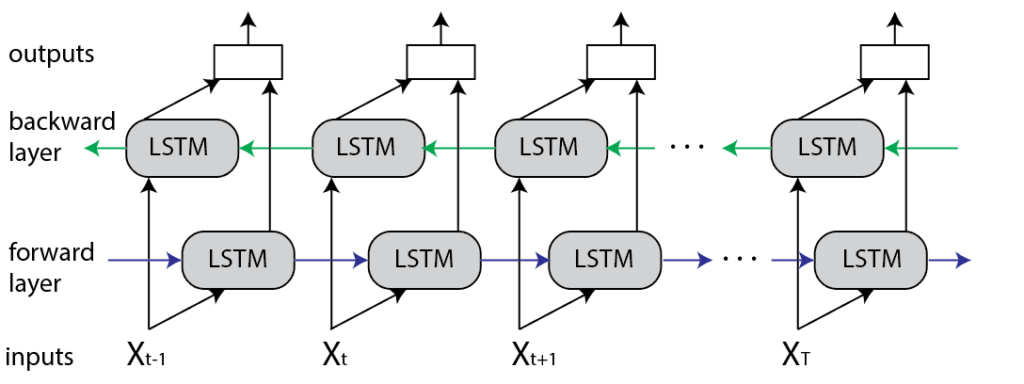



In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout
from tensorflow.keras.initializers import Constant

model_BiLSTM_w2v = Sequential()
model_BiLSTM_w2v.add(Embedding(
    input_dim = WV_DICTIONARY_SIZE,
    output_dim = EMBEDDING_SIZE,
    input_length = MAX_SEQ_LENGTH,
    trainable = False,
    embeddings_initializer = Constant(EMBEDDING_MATRIX)))
model_BiLSTM_w2v.add(Bidirectional(LSTM(64)))
model_LSTM.add(Dropout(0.5))  
model_BiLSTM_w2v.add(Dense(3, activation='softmax'))

In [55]:
model_BiLSTM_w2v.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          322400    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 407,267
Trainable params: 84,867
Non-trainable params: 322,400
_________________________________________________________________


In [56]:
# Compile model
model_BiLSTM_w2v.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training

In [57]:
%%time

EPOCH = 20
BATCH_SIZE = 32

history_BiLSTM_w2v = model_BiLSTM_w2v.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/20
10/10 [==============================] - 8s 97ms/step - loss: 1.0177 - accuracy: 0.3875 - val_loss: 0.8801 - val_accuracy: 0.4875
Epoch 2/20
10/10 [==============================] - 0s 20ms/step - loss: 0.7635 - accuracy: 0.5125 - val_loss: 0.7011 - val_accuracy: 0.5000
Epoch 3/20
10/10 [==============================] - 0s 16ms/step - loss: 0.7013 - accuracy: 0.4781 - val_loss: 0.6978 - val_accuracy: 0.4250
Epoch 4/20
10/10 [==============================] - 0s 14ms/step - loss: 0.6873 - accuracy: 0.5437 - val_loss: 0.7087 - val_accuracy: 0.4500
Epoch 5/20
10/10 [==============================] - 0s 15ms/step - loss: 0.6904 - accuracy: 0.5094 - val_loss: 0.7153 - val_accuracy: 0.4000
Epoch 6/20
10/10 [==============================] - 0s 14ms/step - loss: 0.7000 - accuracy: 0.5125 - val_loss: 0.7206 - val_accuracy: 0.5500
Epoch 7/20
10/10 [==============================] - 0s 13ms/step - loss: 0.7026 - accuracy: 0.5437 - val_loss: 0.7213 - val_accuracy: 0.4250
Epoch 8/20
10

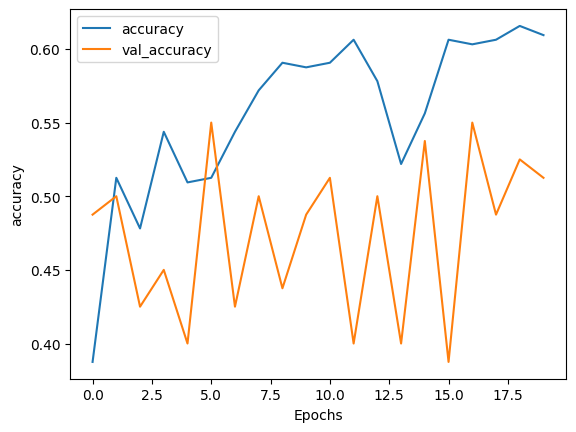

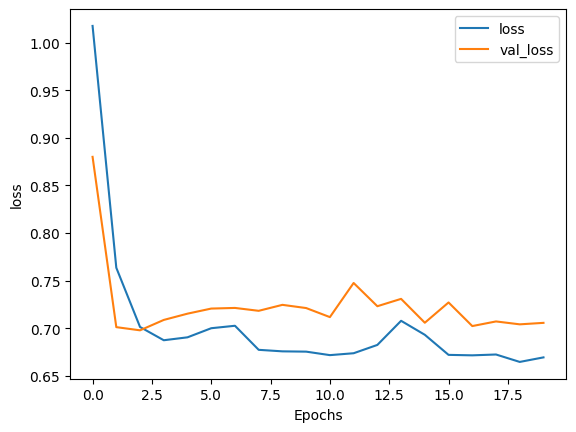

In [58]:
plot_graphs(history_BiLSTM_w2v, 'accuracy')
plot_graphs(history_BiLSTM_w2v, 'loss')

In [59]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_BiLSTM_w2v.history['accuracy'][i], history_BiLSTM_w2v.history['loss'][i], history_BiLSTM_w2v.history['val_accuracy'][i], history_BiLSTM_w2v.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.387500 	   1.017711 	   0.487500 	   0.880100
       2   0.512500 	   0.763532 	   0.500000 	   0.701107
       3   0.478125 	   0.701273 	   0.425000 	   0.697768
       4   0.543750 	   0.687340 	   0.450000 	   0.708686
       5   0.509375 	   0.690409 	   0.400000 	   0.715276
       6   0.512500 	   0.699977 	   0.550000 	   0.720630
       7   0.543750 	   0.702557 	   0.425000 	   0.721295
       8   0.571875 	   0.677267 	   0.500000 	   0.718269
       9   0.590625 	   0.675667 	   0.437500 	   0.724543
      10   0.587500 	   0.675357 	   0.487500 	   0.721172
      11   0.590625 	   0.671689 	   0.512500 	   0.711651
      12   0.606250 	   0.673681 	   0.400000 	   0.747526
      13   0.578125 	   0.682415 	   0.500000 	   0.723099
      14   0.521875 	   0.707778 	   0.400000 	   0.730829
      15   0.556250 	   0.693062 	   0.537500 	   0.705746
      16   0.606250 	   0.671967 	   0.387500 

### Evaluate

In [60]:
# Lakukan prediksi pada data uji
y_pred = np.argmax(model_BiLSTM_w2v.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

loss, accuracy = model_BiLSTM_w2v.evaluate(X_test, y_test)

3/3 [==============================] - 0s 10ms/step - loss: 0.7056 - accuracy: 0.5125


In [61]:
# Tampilkan laporan klasifikasi yang dilakukan model pada data uji
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.42      0.52      0.47        33
           2       0.60      0.51      0.55        47

    accuracy                           0.51        80
   macro avg       0.51      0.51      0.51        80
weighted avg       0.53      0.51      0.52        80

